In [1]:
import numpy as np
import sys

sys.path.append('../scripts')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from elements import *

import measurement as me

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

## Simple Cavity

In the example below we simulate the emmition spectrum of a hot resonator. Here the temperature of the bath is higher than the temperature of the drive and therefore we can see an emmition shaped like a Lorenzian.

0.04486680030822754


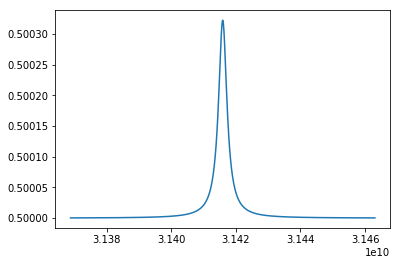

In [47]:
omega_c = 5e9*np.pi*2

kappa_ex = 0.2e6*np.pi*2
kappa_0 = 0.3e6*np.pi*2

kappa = kappa_ex + kappa_0

a = Mode('a', omega_c)

a_inex = Input('ex', a, kappa_ex, kind = 'drive', omega_drive = omega_c, bath_temp=10e-3)
a_in0 = Input('0', a, kappa_0, kind = 'bath', bath_temp=30e-3)

sys_cav = System([a], [a_in0, a_inex], [])

#print (sys_cav.M)

a_outex = Output(sys_cav, a_inex)

omegas = np.linspace(omega_c - 15*kappa, omega_c + 15*kappa, 1001)

import time

t = time.time()
spec = me.spectrum(omegas, me.PowerMeasurement(a_outex), omega_rot=omega_c)
print (time.time() - t)

#print (spec)
plt.figure()


plt.plot(omegas, spec);